# Método da Máxima Verossimilhança


Ideia do campo matemático, usada inicialmente por matemáticos importantes como Gauss e Laplace e posteriormente, no campo da estatística, defendido pelo estatístico inglês Ronald Fisher.

A função densidade de um vetor aleatório $(x_1,...,x_n)$ cuja distribuição depende de um parâmetro $\theta$ é a função densidade de probabilidade conjunta dada por:

$$fx_1,...,x_n(x_1,...,x_n,\theta)$$

Se forem amostras independentes temos $fx_1,...,x_n(x_1,...,x_n,\theta) = fx_1(x_1,\theta)fx_2(x_2,\theta)...fx_n(x_n,\theta)$

E através de que a mesma amostra provém da mesma distribuição de $X$, podemos escrever da seguinte forma:

$$fx_1,...,x_n(x_1,...,x_n,\theta) = \prod_{i=1}^{n}{fx_i(x_i,\theta)}$$

Quando observamos $x_1,...,x_n$ a função $fx_1,...,x_n(x_1,...,x_n,\theta)$ passa a ser uma função do parâmetro $\theta$, chamada de ***função verossimilhança*** e denotada por:

$$L(\theta) = L(\theta;x) = \prod_{i=1}^{n}{fx(x_i;\theta)}$$

A letra $L$ está associada ao termo em inglês ***likelihood*** traduzida como ***verossimilhança***

O estimador de máxima verossimilhança de $\theta$ é tal que $\hat{\theta}$ pertence ao espaço paramétrico e maximiza a função de verossimilhança $L(\theta;x)$.

Ideia : Devemos encontrar $\theta$ de tal forma que os dados observados $x_1,...,x_n$ tenham maior (máximo) probabilidade de serem obtidos.

### EXEMPLO (sem a necessidade de um método numérico)

Aplicando Máxima Verossimilhança para estimar o parâmetro $\theta$ da distribuição exponencial

$$fx(x;\theta)= \theta \exp^{-\theta{x}}, x>0, \theta >0$$

Aplicando o produtório

$L(\theta) = \prod_{i=1}^{n}{fx(x_i;\theta)} = \prod_{i=1}^{n}\theta \exp^{-\theta{x_i}} = \theta^{n}\exp^{-\theta\sum_{i=1}^{n}x_i}$

**OBS**: Maximizar $L(\theta)$ é equivalente a maximizar $log{L(\theta)}$, pois a função logarítima é monótona crescente. Assim, obtemos a função de ***Log Verossimilhança***, o procedimento do $\log$ é mais conveniente e irá alcançar o mesmo máximo.

$$l(\theta) = \log{L(\theta)}$$

Assim

$l(\theta) = \log[\theta^{n}\exp^{-\theta\sum_{i=1}^{n}x_i}] = n\log\theta - \theta\sum_{i=1}^{n}x_i$

Agora a primeira derivada para encontrar o ponto crítico

$$\frac{\partial l}{\partial\theta} = \frac{n}{\theta} - \sum_{i=1}^{n}x_i$$

$$\frac{\partial l}{\partial\theta} = 0 \iff 0 = \frac{n}{\hat\theta} - \sum_{i=1}^{n}x_i \iff \sum_{i=1}^{n}x_i = \frac{n}{\hat\theta} \iff \hat\theta = \frac{1}{\bar{x}}$$

Vendo se será ponto de Máximo ou Mínimo, se for menor que 0 será ponto de Máximo, o contrário será ponto de Mínimo.

$$\frac{\partial^{2}l}{\partial\theta^{2}} = \frac{-n}{\hat\theta^{2}} < 0$$ Logo, Máximo

$$\hat\theta = \frac{1}{\bar{x}}$$ é o estimador de Máxima Verossimilhança de $\theta$

### EXEMPLO (necessidade de um método numérico)

Aplicando Máxima Verossimilhança para estimar o parâmetro $\theta$ da distribuição Lindley unitária (UL)


$$fx(x;\theta) = \frac{\theta^{2}}{1+\theta}(1+x)^{-3}\exp\bigg(-\frac{\theta x}{1-x}\bigg),0<x<1,\theta>0$$

Aplicando o EMV na densidade

verossimilhança:

$$L(\theta) = \prod_{i=1}^{n}fx(xi;\theta)=\prod_{i=1}^{n}\frac{\theta^{2}}{1+\theta}(1+xi)^{-3}\exp\bigg(-\frac{\theta xi}{1-xi}\bigg) =\frac{\theta^{2n}}{(1+\theta)^{n}}\prod_{i=1}^{n}(1+xi)^{-3}\exp\bigg(\sum_{i=1}^{n}-\frac{\theta xi}{1-xi}\bigg)$$

log-verossimilhança:

$$l(\theta)=2n\log\theta - n\log(1+\theta) + \sum_{i=1}^{n}\log(1+xi)^{-3} - \sum_{i=1}^{n}\frac{\theta xi}{1-xi}$$

primeira derivada:

$$\frac{\partial l}{\partial\theta} = \frac{2n}{\theta} - \frac{n}{1+\theta} - \sum_{i=1}^{n}\frac{xi}{1-xi}$$

segunda derivada:

$$\frac{\partial^{2}l}{\partial\theta^{2}} = - \frac{2n}{\theta^{2}} + \frac{n}{(1+\theta)^{2}}$$

C:\Users\jonat\AppData\Local\Temp\ipykernel_6880\2251341043.py:19: RuntimeWarning: divide by zero encountered in divide
  f = lambda theta: ((2 * n) / theta) - (n / (1 + theta)) - np.sum(x/ (1 - x))
C:\Users\jonat\AppData\Local\Temp\ipykernel_6880\2251341043.py:19: RuntimeWarning: invalid value encountered in subtract
  f = lambda theta: ((2 * n) / theta) - (n / (1 + theta)) - np.sum(x/ (1 - x))


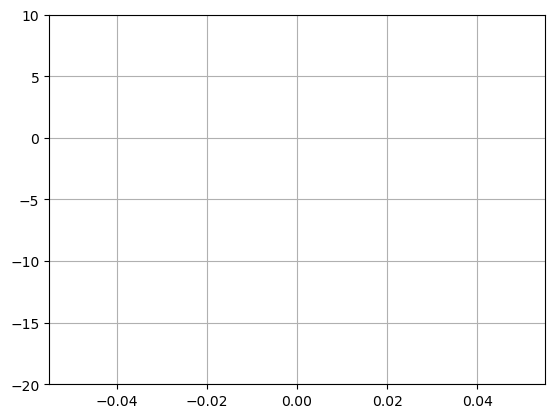

Valor estimado de raiz: -inf - erro: inf
Valor estimado de raiz: nan - erro: nan
A raiz estimada é: nan
Iteração: 1 | Raiz estimada: 60.0 | Erro: 0.16666666666666666
Iteração: 2 | Raiz estimada: 65.0 | Erro: 0.07692307692307693
Iteração: 3 | Raiz estimada: 67.5 | Erro: 0.037037037037037035
Iteração: 4 | Raiz estimada: 68.75 | Erro: 0.01818181818181818
Iteração: 5 | Raiz estimada: 69.375 | Erro: 0.009009009009009009
Iteração: 6 | Raiz estimada: 69.6875 | Erro: 0.004484304932735426
Iteração: 7 | Raiz estimada: 69.84375 | Erro: 0.0022371364653243847
Iteração: 8 | Raiz estimada: 69.921875 | Erro: 0.0011173184357541898
Iteração: 9 | Raiz estimada: 69.9609375 | Erro: 0.0005583472920156337
Iteração: 10 | Raiz estimada: 69.98046875 | Erro: 0.00027909572983533354
Iteração: 11 | Raiz estimada: 69.990234375 | Erro: 0.00013952839402818474
Iteração: 12 | Raiz estimada: 69.9951171875 | Erro: 6.975933031042901e-05


C:\Users\jonat\AppData\Local\Temp\ipykernel_6880\2251341043.py:11: RuntimeWarning: invalid value encountered in scalar subtract
  x_novo   = x_antigo - f(x_antigo)/df(x_antigo)


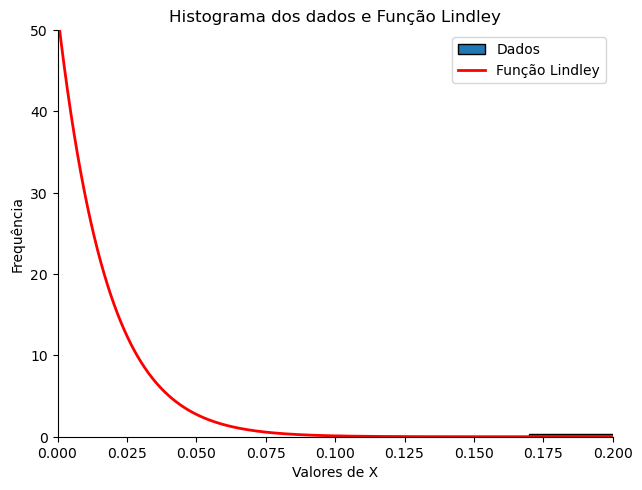

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/data.csv")

def newton(f, df, x_antigo, tolerancia = 1e-4):
  erro = 1

  while erro > tolerancia:
    x_novo   = x_antigo - f(x_antigo)/df(x_antigo)
    erro     = abs(x_antigo - x_novo)/abs(x_antigo)
    x_antigo = x_novo
    print(f'Valor estimado de raiz: {x_novo} - erro: {erro}')

  print(f'A raiz estimada é: {x_novo}')

lindley = lambda x: (theta**2/(1+theta))*((1+x)**-3)*np.exp((-theta*x)/(1-x))
f = lambda theta: ((2 * n) / theta) - (n / (1 + theta)) - np.sum(x/ (1 - x))
derivf = lambda theta: -(2 * n) / theta**2 + n / ((1 + theta)**2)

n = df.shape[0]
x = pd.to_numeric(df.iloc[:, 1], errors='coerce')

theta = np.linspace(0, 200, 1000)
plt.plot(theta, f(theta), "-")
plt.grid()
plt.ylim(-20, 10)
plt.show()

theta0 = 50
newton(f, derivf, theta0, 1e-4)

def bissec(f, a, b, eps = 1e-4):
    err = 100
    x_ant = a
    iteracao = 1
    while err>eps:
        x = (a+b)/2.0
        err = abs(x - x_ant)/abs(x)
        if f(a)*f(x)<0:
            b = x
        else:
            a = x
        x_ant = x
        print (f'Iteração: {iteracao} | Raiz estimada: {x} | Erro: {err}')
        iteracao +=1
    return (x)

a = 50
b = 70
bissec(f,a,b)

theta = 53.1298828125

x2 = np.linspace(0, 0.2, 1000)

plt.hist(x, density=True, edgecolor='black', label='Dados')

plt.plot(x2, lindley(x2), '-', color='red', linewidth=2, label='Função Lindley')

plt.xlabel('Valores de X')
plt.ylabel('Frequência')
plt.tight_layout()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.ylim(0, 50)
plt.xlim(0,0.2)
plt.title('Histograma dos dados e Função Lindley')
plt.legend()
plt.show()